In [4]:
%load_ext autoreload
%autoreload 2
import os
os.chdir("/scratch/ewalt/pdm/rs-uncertainty")
import matplotlib.pyplot as plt
from src.metrics import StratifiedRCU
from src.viz import ExperimentVisualizer
import wandb
import numpy as np
import pandas as pd
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load

In [5]:
result_dirs = [os.path.join("results", p) for p in [
    "2023-04-25_17-48-18_cloud_threshold_0-01",
    "2023-04-25_17-38-31_baseline",
    "2023-04-25_17-48-18_cloud_threshold_0-25",
    "2023-04-25_17-48-18_cloud_threshold_0-50",
    "2023-04-25_17-48-18_cloud_threshold_0-75",
    #"2023-04-25_17-48-18_cloud_threshold_1-00",
]]

In [7]:
visualizer = ExperimentVisualizer.from_paths(
    result_dirs,
    "cloud_threshold",
    [0.01, 0.1, 0.25, 0.5, 0.75, 1.00],
    ['P95', 'MeanH', 'Dens', 'Gini', 'Cover']
)

## Datasets informations

In [8]:
# sample size
data = {visualizer.exp_var_name: [], "count": []}
for i, rcu in enumerate(visualizer.rcus):
    count = np.nansum(rcu.histogram[0,0])
    data[visualizer.exp_var_name].append(visualizer.exp_vars[i])
    data["count"].append(count)
pd.DataFrame(data)

,cloud_threshold,count
0,0.01,17625572.0
1,0.10,17661831.0
2,0.25,17664998.0
3,0.50,17665277.0
4,0.75,17665294.0


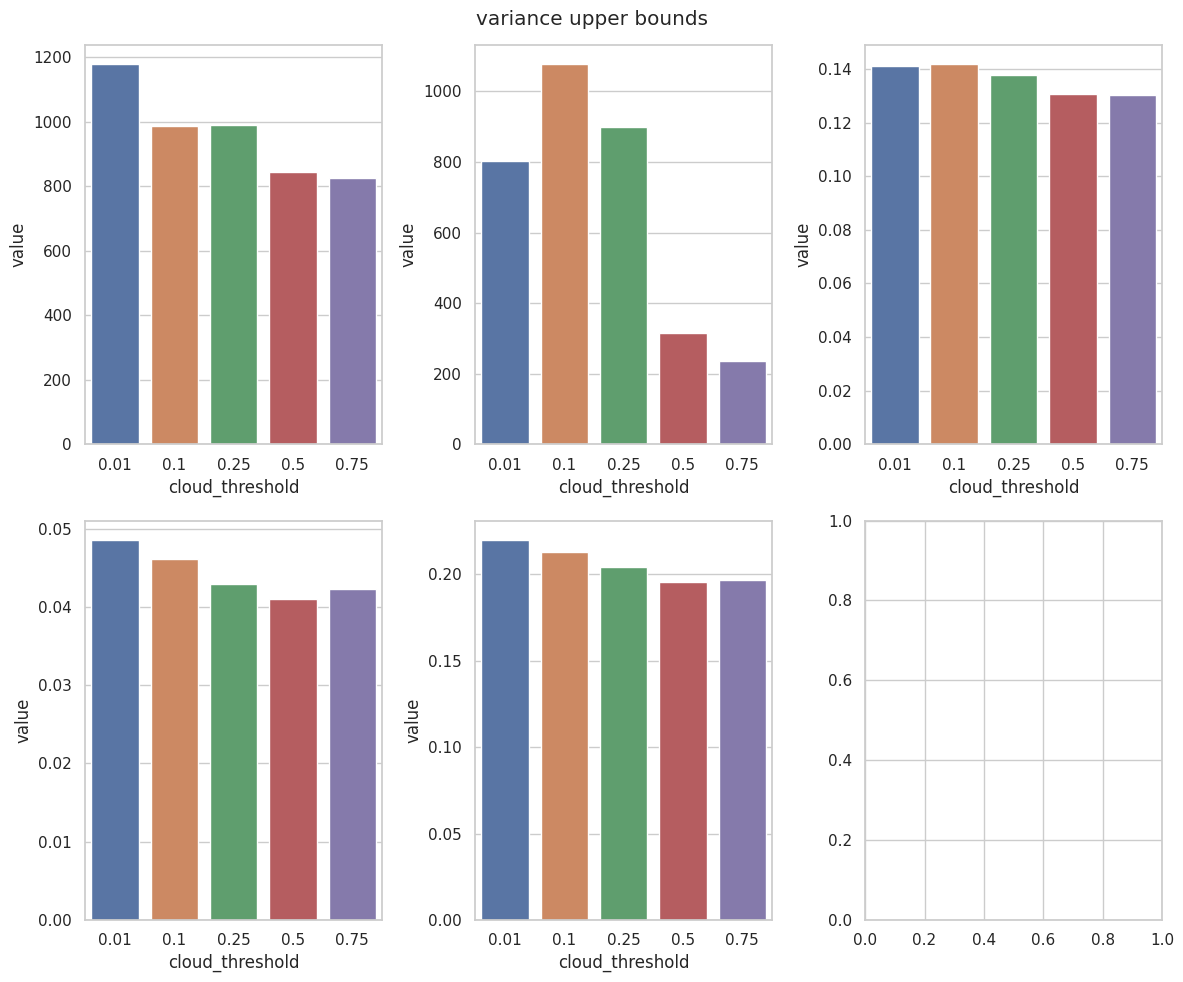

In [9]:
variable_names = ['P95', 'MeanH', 'Dens', 'Gini', 'Cover']

# variance upper bounds
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axs = axs.flatten()
for j, var in enumerate(variable_names):
    data = {visualizer.exp_var_name: [], "value": []}
    for i, rcu in enumerate(visualizer.rcus):
        varhi = rcu.histogram.hi[j]
        data[visualizer.exp_var_name].append(visualizer.exp_vars[i])
        data["value"].append(varhi)
    vdf = pd.DataFrame(data)
    sns.barplot(data=vdf, x=visualizer.exp_var_name, y="value", errorbar=None, ax=axs[j])
    # sns.barplot(data=vdf, x=visualizer.exp_var_name, y="upper bound", errorbar=None, ax=uaxs[j])
fig.suptitle("variance upper bounds")
plt.tight_layout()
plt.show()

## Variance histograms

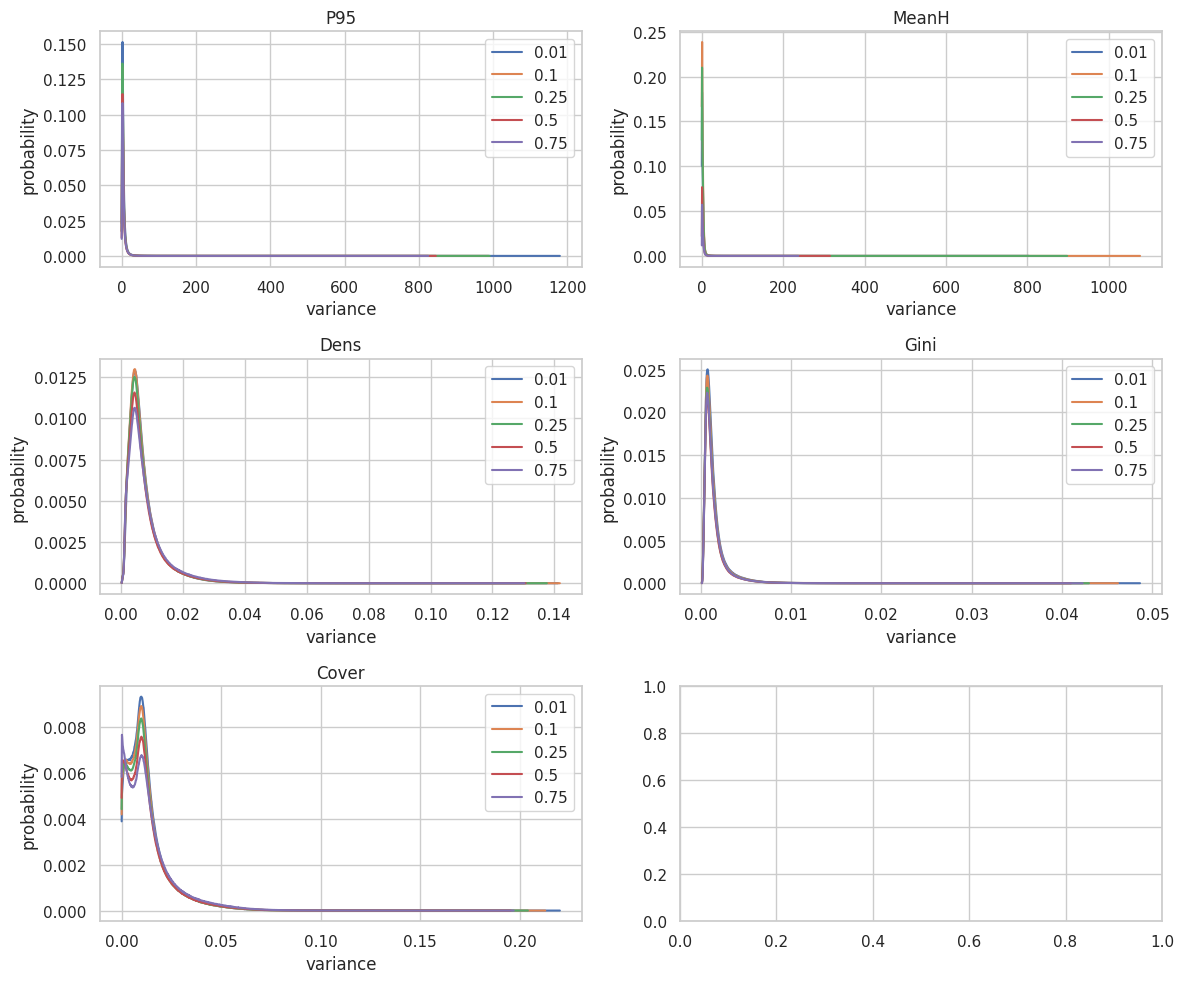

In [18]:
# Histogram: we expect less low variance estimates when the cloud threshold increases
visualizer.histogram_plot(log=False)
plt.tight_layout()
plt.show()

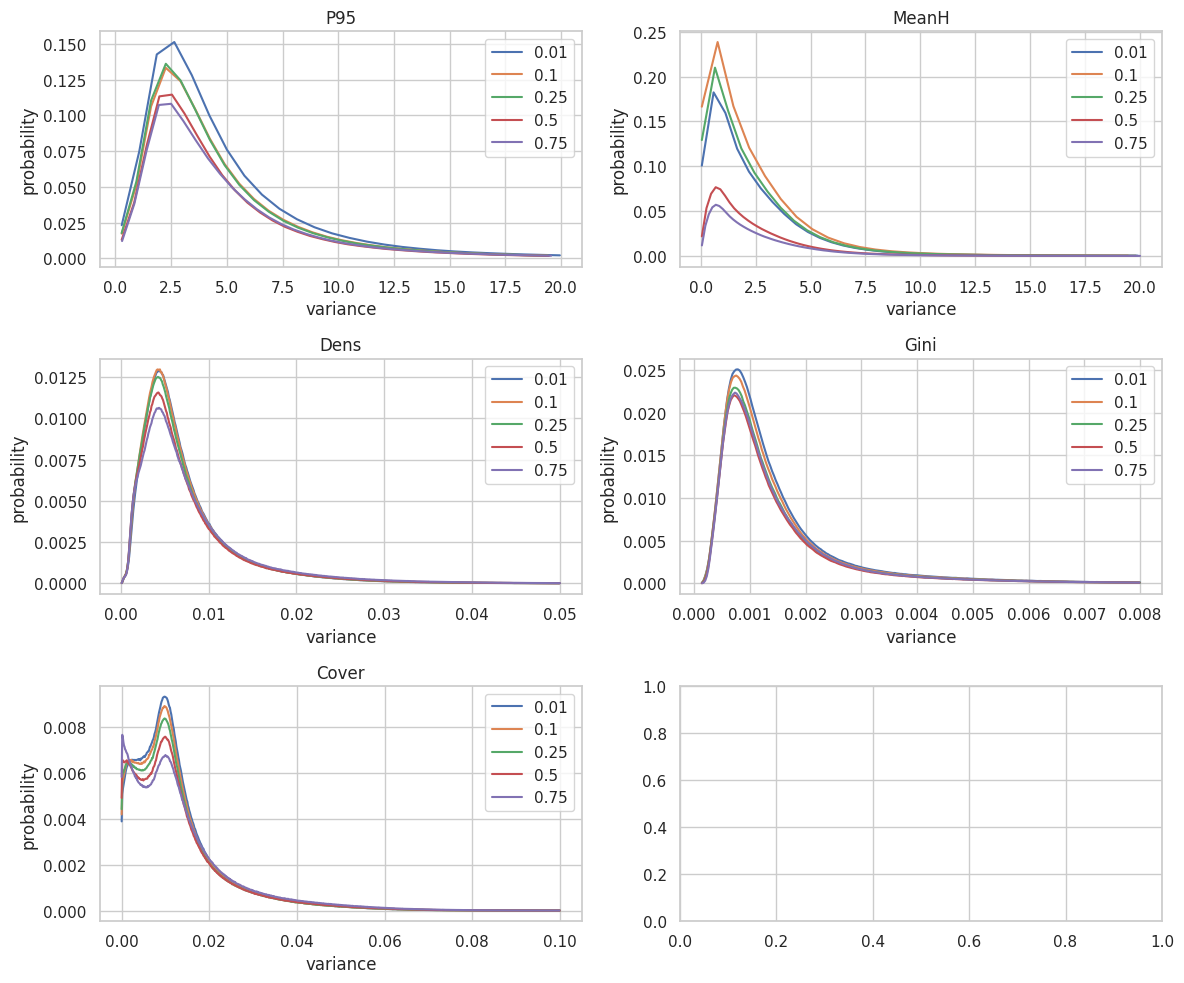

In [12]:
visualizer.histogram_plot(hi_bound=[20, 20, 0.05, 0.008, 0.1], log=False)
plt.tight_layout()
plt.show()

## Metric vs CTs

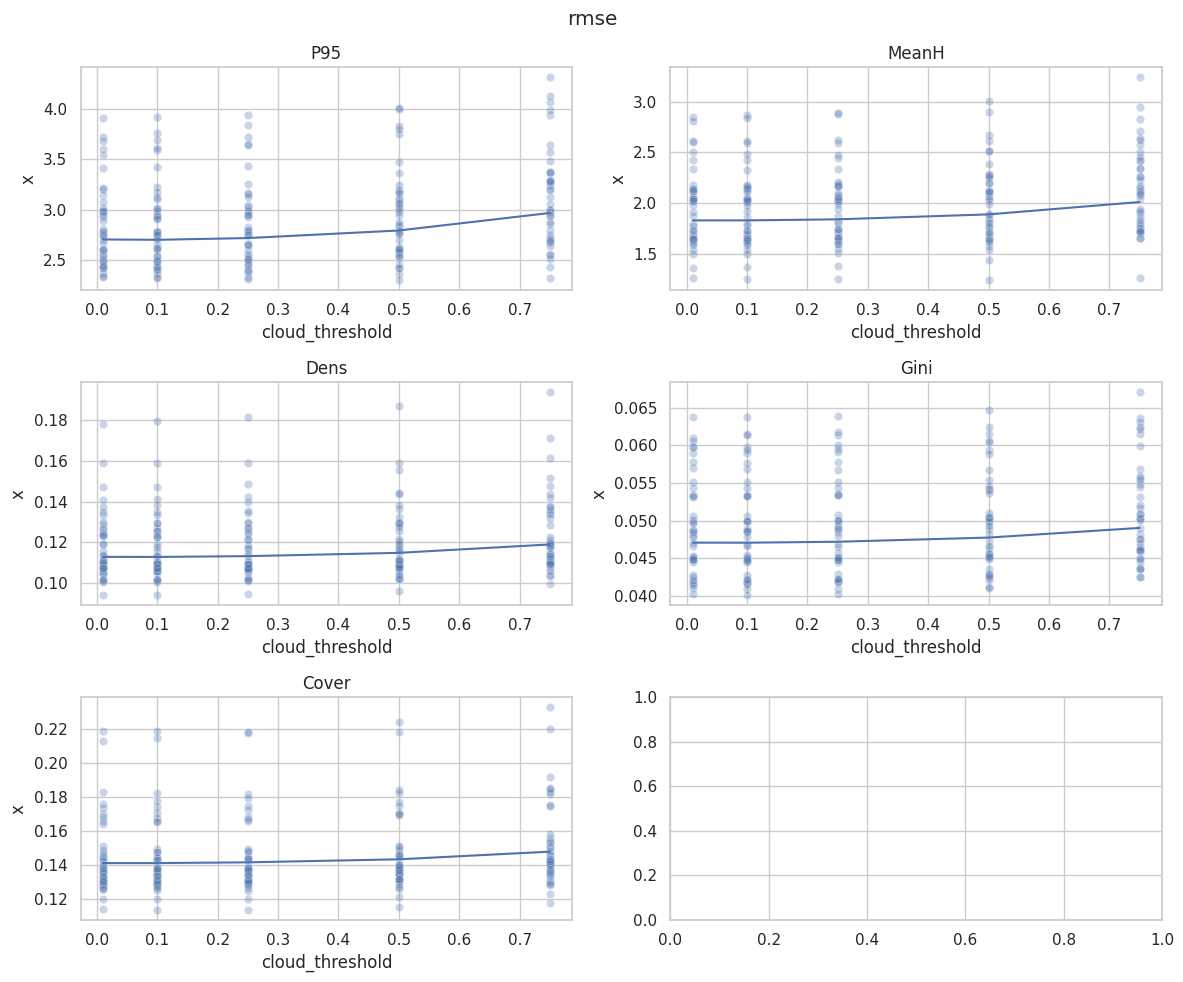

In [13]:
# rmse (min): Should increase as the data shift to unseen territories
axs = visualizer.metric_plot("rmse", "agg")
plt.tight_layout()
plt.show()

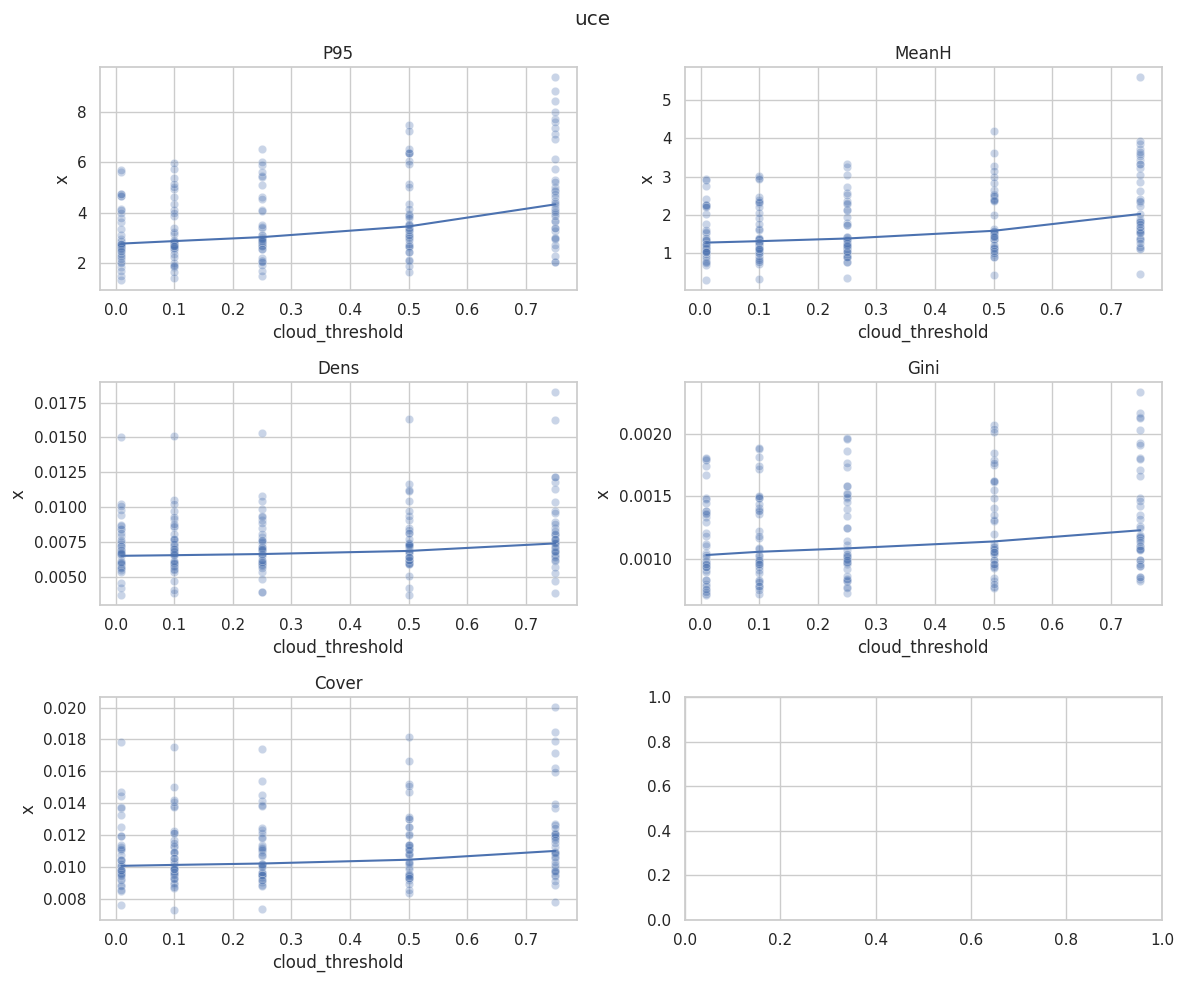

In [14]:
# uce (min): should stay constant if calibration is consistent
axs = visualizer.metric_plot("uce", "agg")
plt.tight_layout()
plt.show()

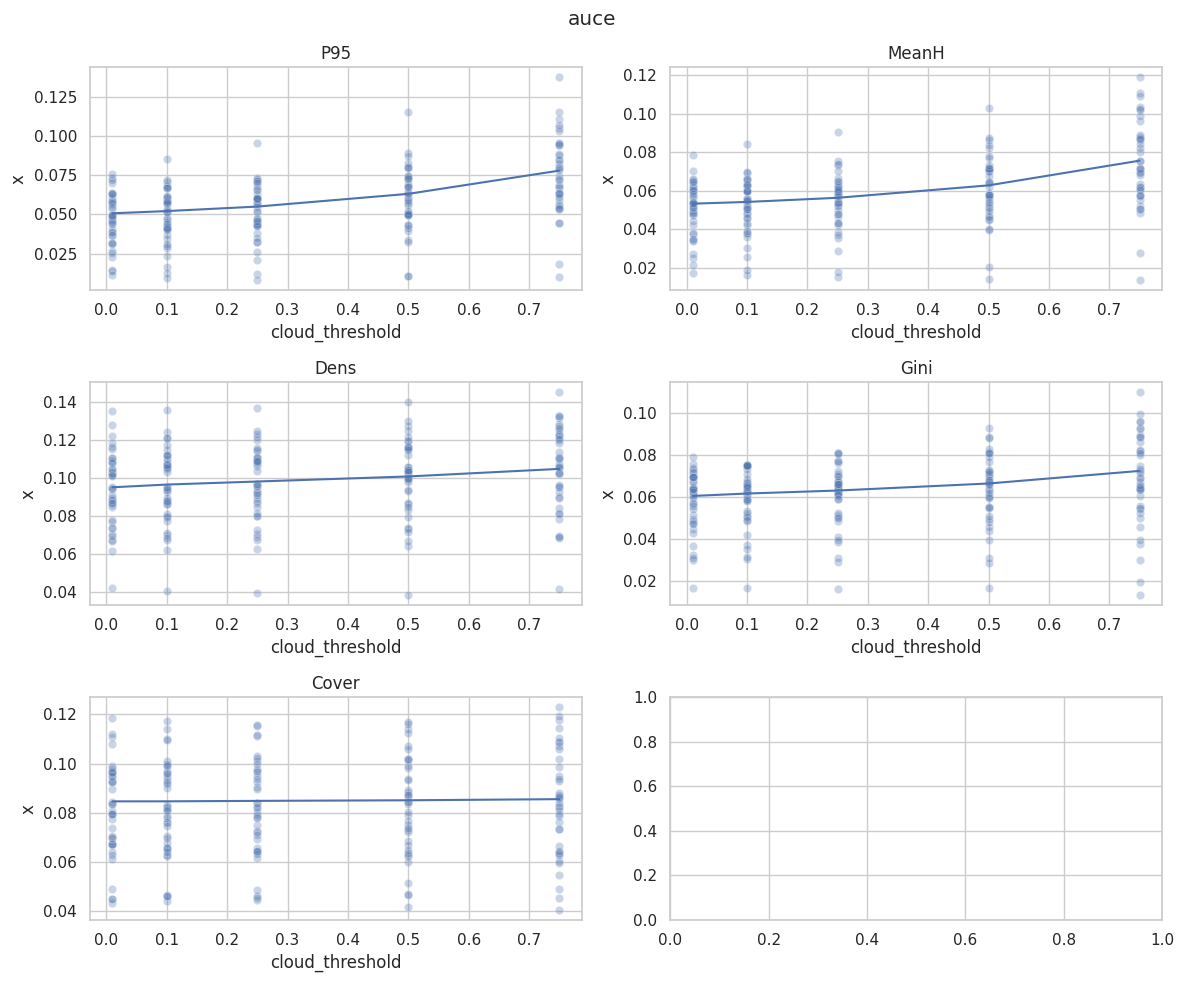

In [15]:
# auce (min): should stay constant if calibration is consistent
axs = visualizer.metric_plot("auce", "agg")
plt.tight_layout()
plt.show()

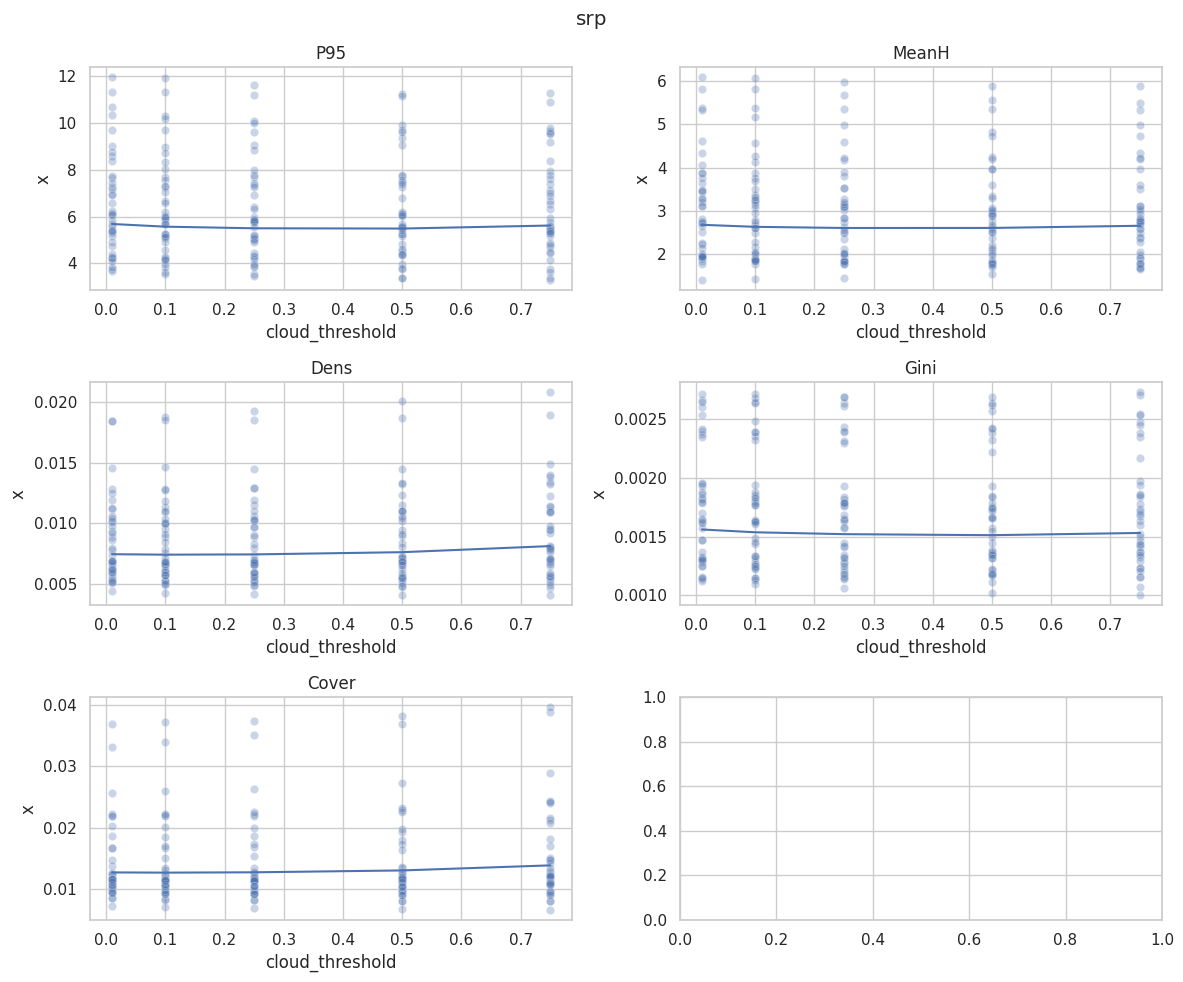

In [16]:
# srp (min): Should increase as the model should be less confident, i.e. produce higher mean variance estimates
axs = visualizer.metric_plot("srp", "agg")
plt.tight_layout()
plt.show()

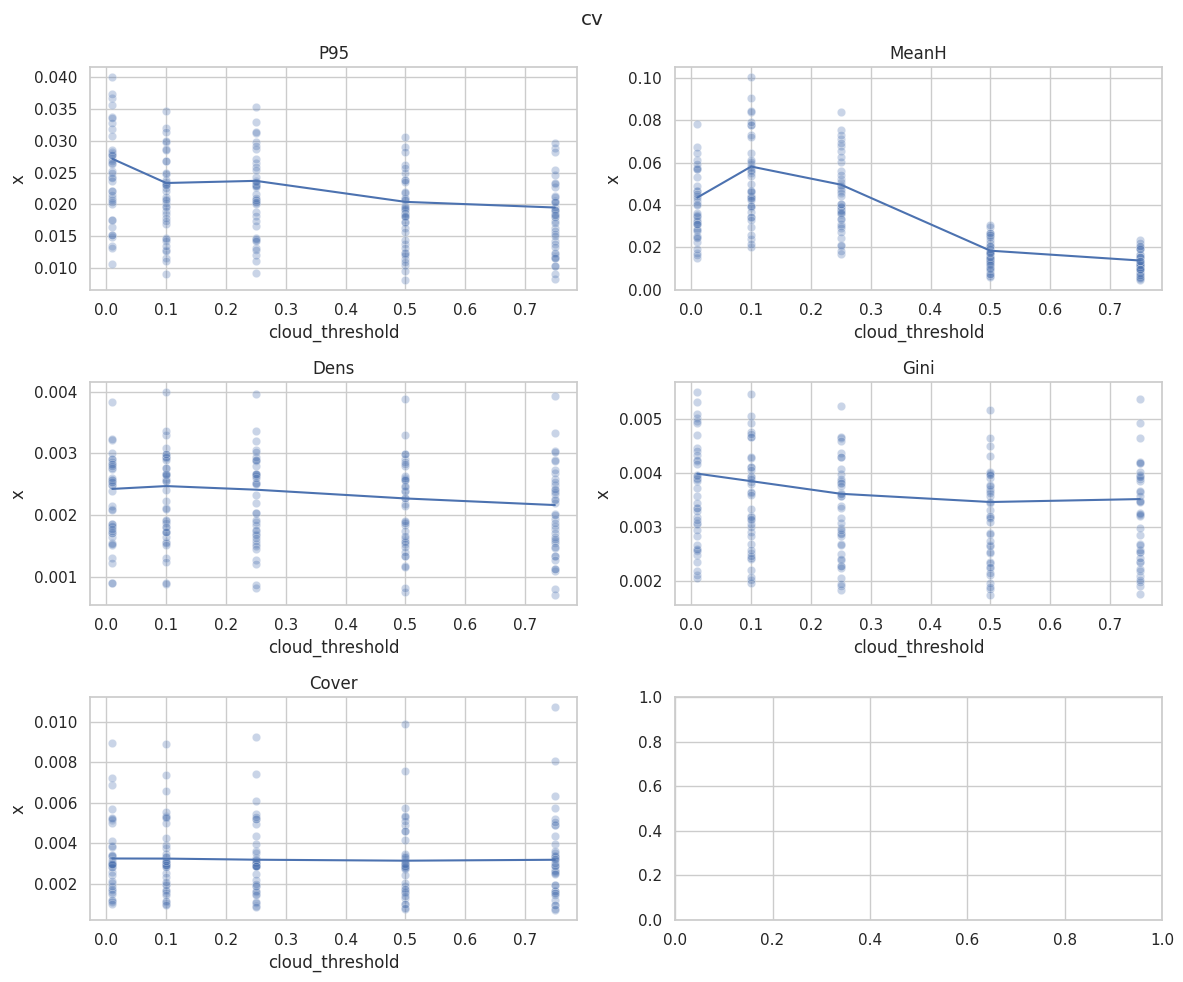

In [17]:
# cv (max): As the variance estimates distribution is heavy-tailed, we expect Cv to increase 
axs = visualizer.metric_plot("cv", "agg")
plt.tight_layout()
plt.show()

## Calibration curves

/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)


(15,)


/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)


(15,)


/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)


(15,)


/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)


(15,)


/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)


(15,)


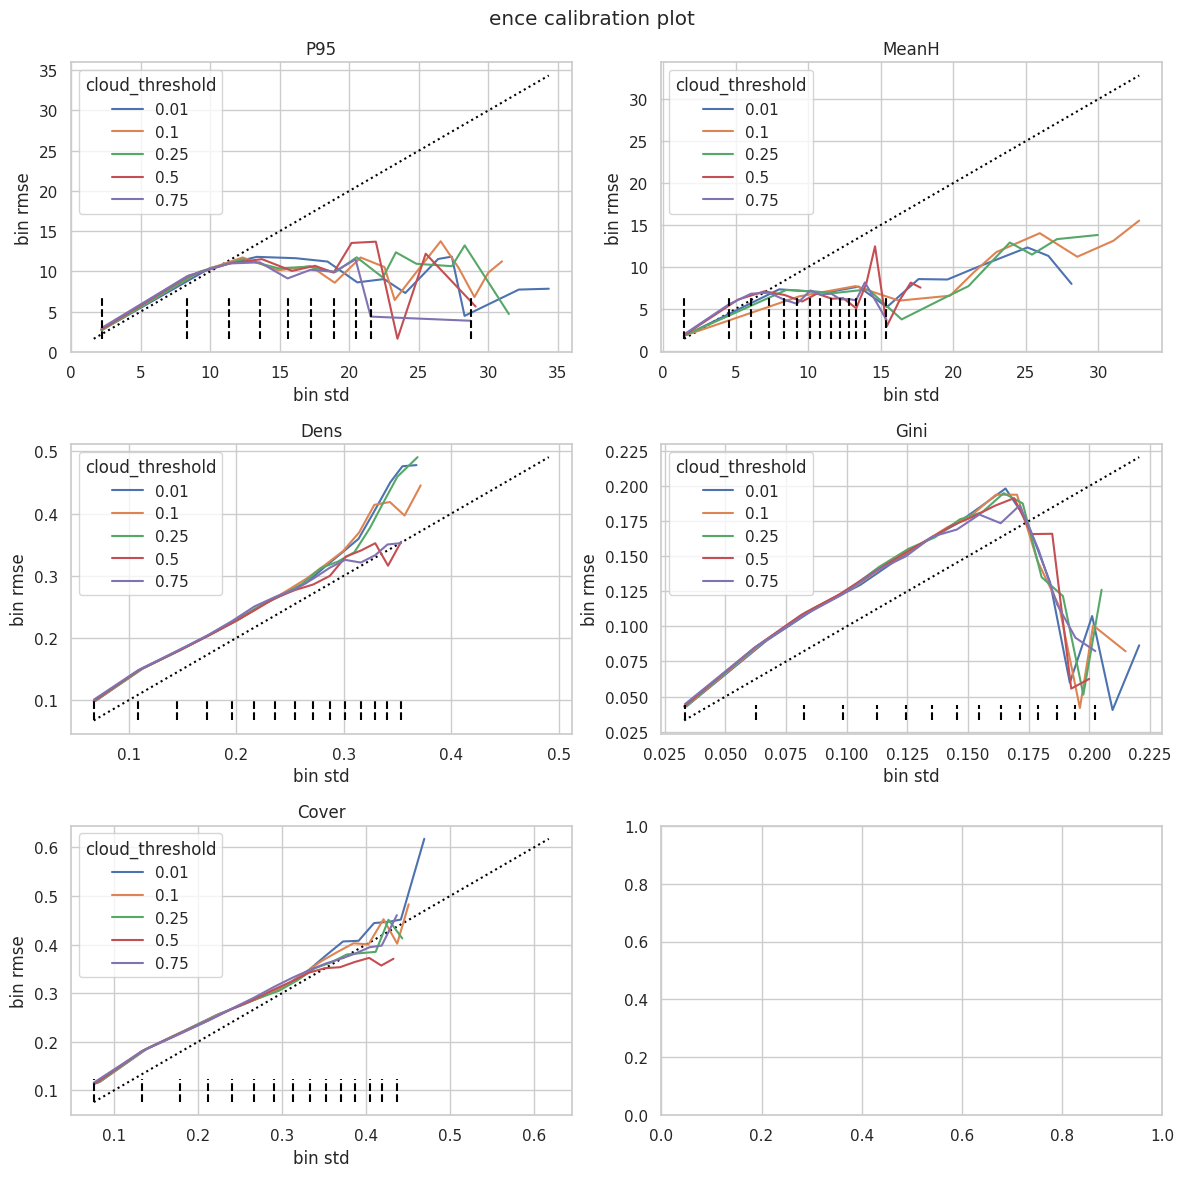

In [57]:
visualizer.calibration_plot("ence", log_bins=False)
plt.tight_layout()
plt.show()

/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)


(15,)


/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)


(15,)


/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)


(15,)


/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)


(15,)


/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)


(15,)


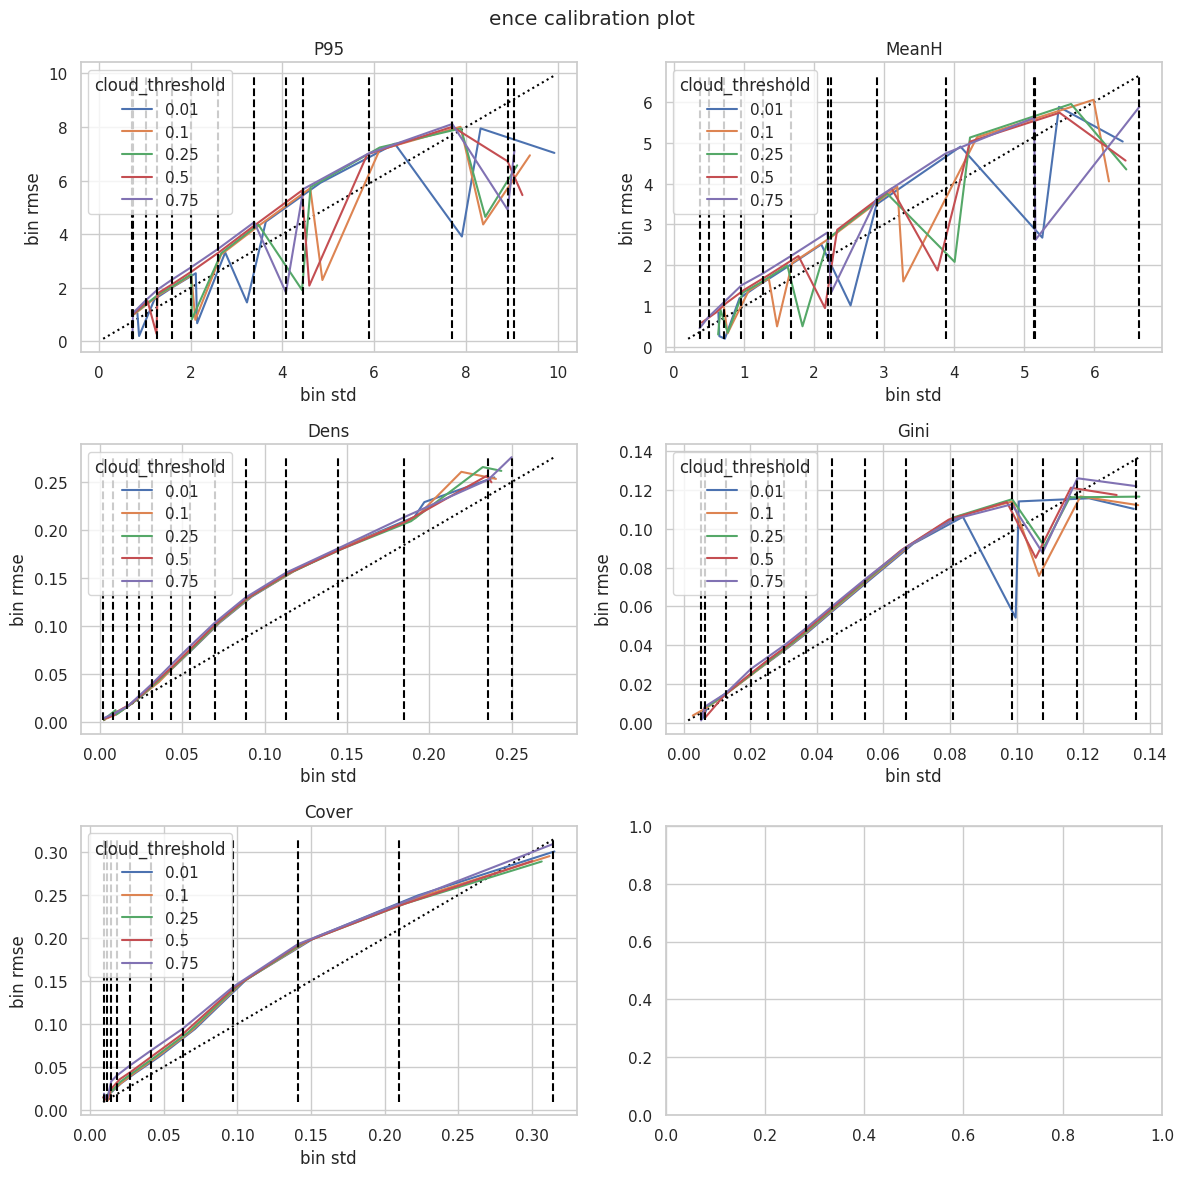

In [56]:
visualizer.calibration_plot("ence", log_bins=True)
plt.tight_layout()
plt.show()

## AUCE

/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  

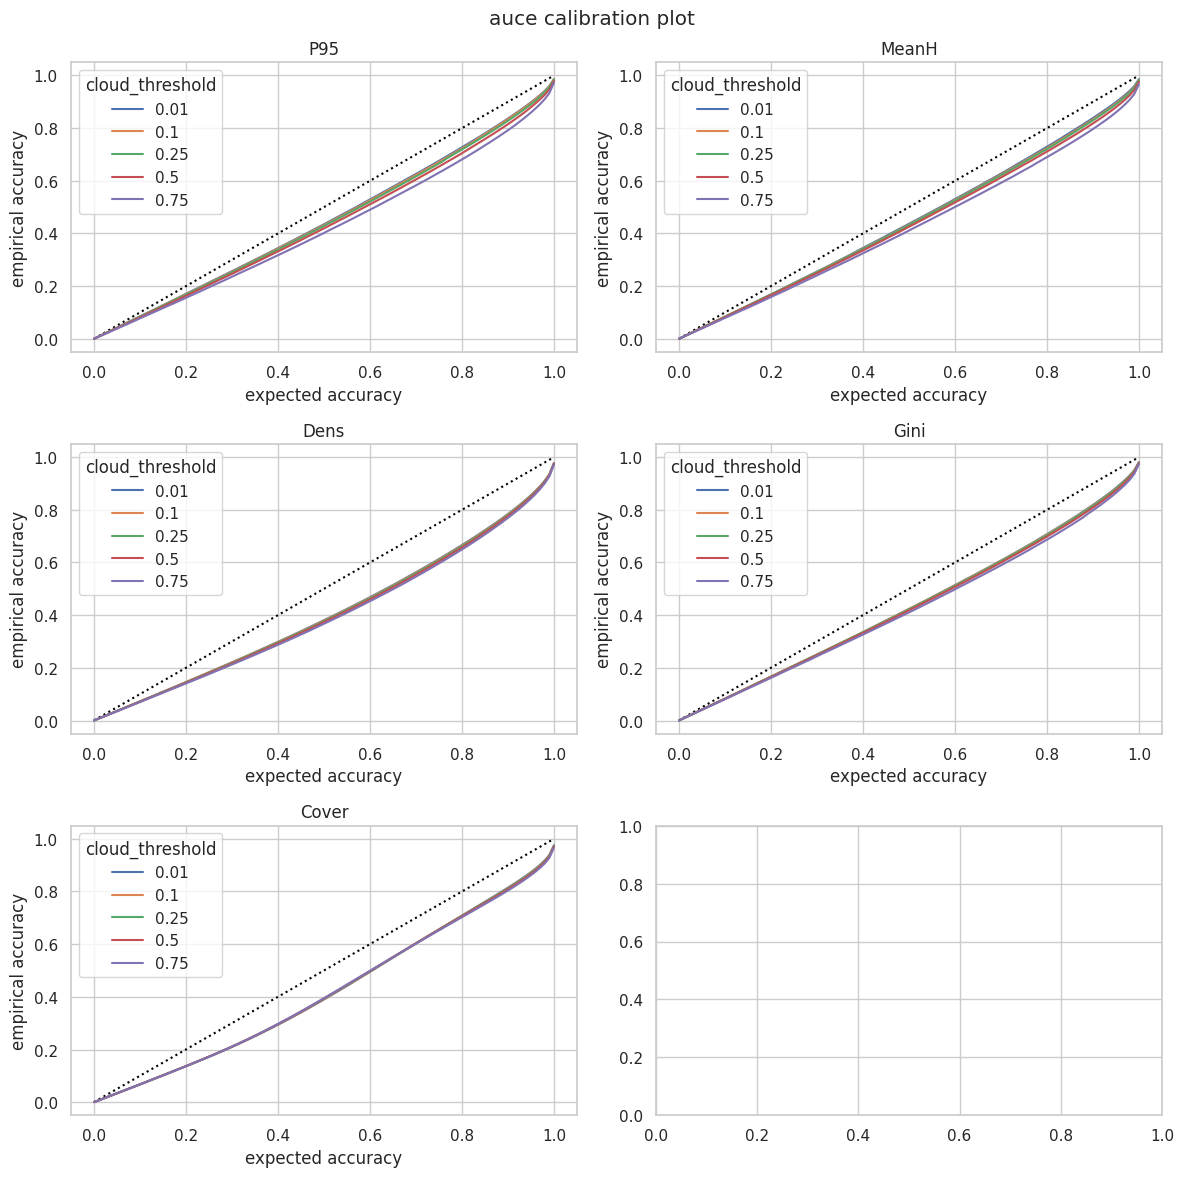

In [48]:
visualizer.calibration_plot("auce", log_bins=True)
plt.tight_layout()
plt.show()

## Load RCUs

In [13]:
rcus = [StratifiedRCU.from_json(os.path.join(runs_dir, rn, "rcu.json")) for rn in run_names]

FileNotFoundError: [Errno 2] No such file or directory: 'results/2023-04-26_11-03-49_cloud_threshold_0-01/rcu.json'

In [14]:
!ls 

/scratch/ewalt/pdm/rs-uncertainty


## WandB CT Runs

In [35]:
api = wandb.Api()
baseline_run = api.runs(
    path="rs-uncertainty/rcu-evaluation",
    filters={"tags": "baseline"}
)[0]
ct_runs = api.runs(
    path="rs-uncertainty/rcu-evaluation",
    filters={"tags": "cloud_threshold"}
)

In [37]:
ct_runs[0].config.keys()

dict_keys(['dataset.name', 'dataset.gt_dir', 'evaluation.tags', 'prediction.name', 'dataset.projects', 'dataset.save_dir', 'evaluation.gt_dir', 'prediction.gt_dir', 'prediction.margin', 'dataset.data_bands', 'dataset.patch_size', 'evaluation.pkl_dir', 'prediction.pkl_dir', 'evaluation.num_bins', 'prediction.projects', 'prediction.save_dir', 'evaluation.data_bands', 'prediction.data_bands', 'prediction.patch_size', 'dataset.split_mask_dir', 'evaluation.projects_east', 'evaluation.projects_west', 'dataset.sampling_strategy', 'evaluation.normalize_mean', 'evaluation.prediction_dir', 'evaluation.projects_north', 'evaluation.variable_names', 'prediction.split_mask_dir', 'dataset.project_shapefiles', 'dataset.s1_reprojected_dir', 'dataset.s2_reprojected_dir', 'prediction.checkpoint_dirs', 'dataset.cloud_prob_threshold', 'evaluation.upsampling_coeffs', 'prediction.sampling_strategy', 'evaluation.normalize_variance', 'prediction.project_shapefiles', 'prediction.s1_reprojected_dir', 'prediction

In [39]:
for ct_run in ct_runs:
    print(ct_run.config["dataset.cloudy_pixels_threshold"], ct_run.name)

0.5 2023-04-25_17-48-18_cloud_threshold_0-50
1 2023-04-25_17-48-18_cloud_threshold_1-00
0.75 2023-04-25_17-48-18_cloud_threshold_0-75
0.25 2023-04-25_17-48-18_cloud_threshold_0-25
0.01 2023-04-25_17-48-18_cloud_threshold_0-01


## ExperimentVisualizer

In [62]:
import pandas as pd

In [83]:
ev = CloudThresholdVisualizer(entity="rs-uncertainty", project="rcu-evaluation")

Found 5 runs for experiment on variable dataset.cloudy_pixels_threshold.


In [84]:
baseline, runs, df = ev.baseline, ev.runs, ev.df

In [85]:
df

,experiment,dataset.cloudy_pixels_threshold,kind,metric,variable,group,value
0,cloud_threshold,0.5,ause,rmse,Cover,9,0.121663
1,cloud_threshold,0.5,agg,rmse,Dens,north,0.126946
2,cloud_threshold,0.5,ause,auce,Cover,959,0.099613
3,cloud_threshold,0.5,agg,mae,MeanH,global,1.457118
4,cloud_threshold,0.5,agg,mse,P95,920,17.013788
...,...,...,...,...,...,...,...
28375,baseline,0.1,agg,ence,Gini,415,0.000599
28376,baseline,0.1,agg,mbe,MeanH,346,0.123375
28377,baseline,0.1,agg,srp,MeanH,477,5.376637
28378,baseline,0.1,ause,auce,MeanH,521,0.043469


In [80]:
baseline.files()[0]

<File artifact/433917062/wandb_manifest.json (application/json) 0.0B>

In [82]:
baseline.log

AttributeError: '<Run rs-uncertainty/rcu-evaluation/oy32thjj (running)>' object has no attribute 'log'

In [86]:
wandb.Api()

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
